In [73]:

import os
import sys
import importlib
from collections import defaultdict
sys.path.insert(0, '/n/groups/htem/Segmentation/shared-nondev/cb2_segmentation/analysis_mf_grc')

from tools_pattern import get_eucledean_dist
import compress_pickle

import my_plot
importlib.reload(my_plot)
from my_plot import MyPlotData, my_box_plot

# script_n = os.path.basename(__file__).split('.')[0]
script_n = '2share_dist_cumulative_vs_random_210116'

norm = 555

def calc_mpd(input_data, kind):
    mpd = MyPlotData()
    for n, distances in enumerate(input_data[0]):
        hist = defaultdict(int)
        mpd_trial = MyPlotData()
        for d in distances:
            # mpd.add_data_point(
            #     dist=d,
            #     kind='Naive Random',
            #     trial=n,
            #     )
            hist[int(d)] += 1
        # for d in sorted(hist.keys()):
        for d in range(max(hist.keys())):
            mpd_trial.add_data_point(
                dist=d,
                count=hist[d],
                kind=kind,
                trial=n,
            )
        mpd_trial = mpd_trial.to_pdf('count', cumulative=True, fixed_scale=norm)
        mpd.append(mpd_trial)
    return mpd

mpd_data = {}
labels = []

import compress_pickle
label = 'Observation'
labels.append(label)
data = compress_pickle.load('2share_by_dist_observed.gz')
mpd_data[label] = calc_mpd(data, kind=label)

# label = 'Local Random'
# labels.append(label)
# data = compress_pickle.load('2share_by_dist_210117_naive_200.gz')
# mpd_data[label] = calc_mpd(data, kind=label)

label = 'Local Random'
labels.append(label)
data = compress_pickle.load('2share_by_dist_210117_naive2_200.gz')
mpd_data[label] = calc_mpd(data, kind=label)

label = 'LocalEx Random'
labels.append(label)
data = compress_pickle.load('2share_by_dist_210117_localex30_200.gz')
mpd_data[label] = calc_mpd(data, kind=label)

# label = 'LocalEx50'
# labels.append(label)
# data = compress_pickle.load('2share_by_dist_210117_localex50_200.gz')
# mpd_data[label] = calc_mpd(data, kind=label)


Height: 4, Aspect: 1.25


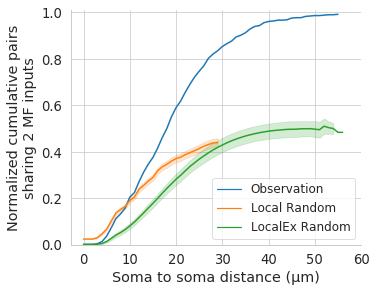

In [74]:

def custom_legend_fn(plt):
#     plt.legend(bbox_to_anchor=(1.025, .8), loc='upper left', borderaxespad=0.)
    plt.legend(loc='lower right', frameon=True, fontsize=12)

mpd_total = MyPlotData()
for label in labels:
    mpd_total.append(mpd_data[label])
# mpd_total.append(mpd_naive)
# mpd_total.append(mpd_random_correct)

importlib.reload(my_plot); my_plot.my_relplot(
    mpd_total,
    x='dist',
    y='count',
    hue='kind',
    kind='line',
    ci='sd',
    # stat="density",
    # kde=True,
    # hue_order=['Data', 'Shuffle'],
    context='paper',
    xlim=(None, 60),
#     xlim=(None, 105),
    ylim=[0, 1.01],
    height=4,
    aspect=1.25,
    y_axis_label='Normalized cumulative pairs\nsharing 2 MF inputs',
    x_axis_label='Soma to soma distance (μm)',
    save_filename=f'{script_n}.svg',
    show=True,
    custom_legend_fn=custom_legend_fn,
#     tight_layout=True,
#     tight_layout=False,
#     old_tight_layout=True,
    )

